# opencv

opencv 一些默认的东西
* 图片默认是BGR
* 背景黑色，前景白色


In [1]:
import cv2
print(cv2.__version__)

4.10.0


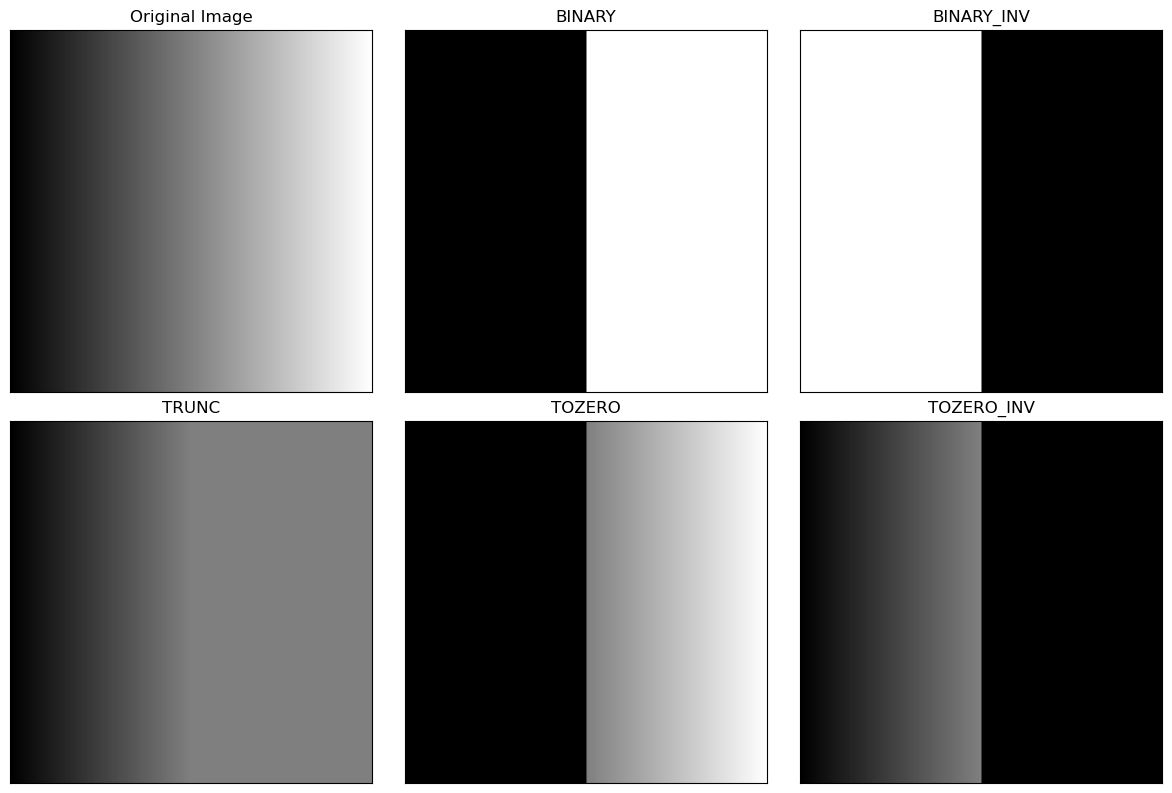

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
# 创建一个灰度渐变图像
width, height = 256, 256
gradient = np.tile(np.linspace(0, 255, width, dtype=np.uint8), (height, 1))

# # gradient = cv.imread('gradient.png', cv.IMREAD_GRAYSCALE) # cv.imread('', 0)
assert gradient is not None, "file could not be read, check with os.path.exists()"

# 应用不同的阈值方法
# # BINARY：当像素值大于127时设为255（白色），否则设为0（黑色）
ret, thresh1 = cv.threshold(gradient, 127, 255, cv.THRESH_BINARY) 

# # BINARY_INV：与BINARY相反，当像素值大于127时设为0（黑色），否则设为255（白色）。
ret, thresh2 = cv.threshold(gradient, 127, 255, cv.THRESH_BINARY_INV)  

# # TRUNC：当像素值大于127时设为127，其他保持不变，使得图像上限为127。
ret, thresh3 = cv.threshold(gradient, 127, 255, cv.THRESH_TRUNC)  # 

# # TOZERO：当像素值大于127时保持不变，否则设为0（黑色）。
ret, thresh4 = cv.threshold(gradient, 127, 255, cv.THRESH_TOZERO)  # 

# # TOZERO_INV：当像素值大于127时设为0（黑色），其他保持不变。
ret, thresh5 = cv.threshold(gradient, 127, 255, cv.THRESH_TOZERO_INV)  # 

# 设置标题和图像数组
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gradient, thresh1, thresh2, thresh3, thresh4, thresh5]

# 使用matplotlib显示结果
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# distance_ imageData

* opencv中的角度是顺时针的，通常角度是逆时针方向

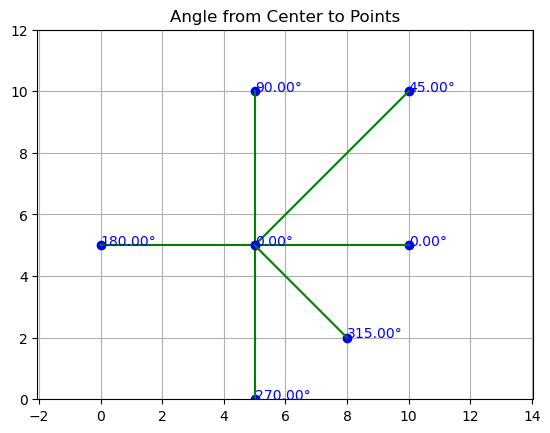

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# def calc_angle(point, center):
#     delta_x = point[0] - center[0]
#     delta_y = point[1] - center[1]
#     angle = np.arctan2(delta_y, delta_x)
#     return angle
# def angle2circle(artanAngle):
#     if artanAngle >= 0:
#         return artanAngle
#     else:
#         return 2*np.pi + artanAngle

# 计算点的圆心角-弧度 -> [-pi, pi]， 起点是圆心点center的水平向右方向，逆时针旋转角度
def calc_radian(point, center):
    delta_x = point[0] - center[0]
    delta_y = point[1] - center[1]
    c_radian = np.arctan2(delta_y, delta_x)  
    """
    # np.arctan2 -->[-pi, pi]
    pi,          0
        center------>
    -pi,         0

    need normal, align to a whole circle:
    pi,          0
        center------>
    pi,          2pi
    """
    # align to a whole circle [0, 2pi]
    if c_radian >= 0:
        return c_radian
    else:
        return (c_radian + 2*np.pi)



# 定义中心点
center = (5, 5)

# 定义一些点
points = [(10, 10), (5, 10), (0, 5), (5, 0), (10, 5), (5, 5), (8, 2)]

# 创建图形和坐标轴
fig, ax = plt.subplots()
ax.plot(center[0], center[1], 'ro')  # 红色点为中心

# 画出每个点和从中心到点的线
for point in points:
    angle = calc_radian(point, center)
    ax.plot(point[0], point[1], 'bo')  # 蓝色点为测试点
    ax.text(point[0], point[1], f'{np.degrees(angle):.2f}°', color='blue')
    ax.plot([center[0], point[0]], [center[1], point[1]], 'green')  # 绿线显示从中心到点的线

# 设置图形属性
ax.set_xlim([0, 12])
ax.set_ylim([0, 12])
ax.set_aspect('equal', adjustable='datalim')
ax.grid(True)
plt.title("Angle from Center to Points")

# 显示图形
plt.show()


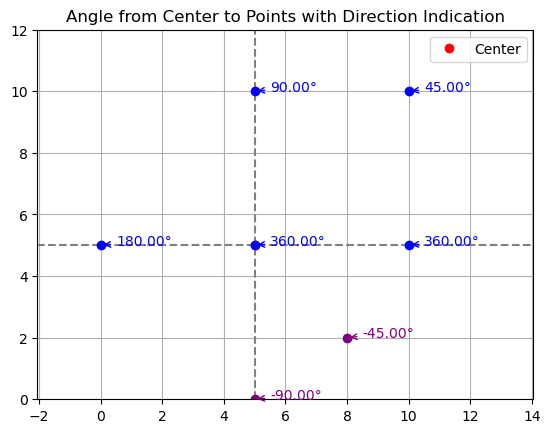

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def calc_radian(point, center):
    delta_x = point[0] - center[0]
    delta_y = point[1] - center[1]
    c_radian = np.arctan2(delta_y, delta_x)
    return c_radian if c_radian else (2*np.pi + c_radian)

# 定义中心点
center = (5, 5)

# 定义一些点
points = [(10, 10), (5, 10), (0, 5), (5, 0), (10, 5), (5, 5), (8, 2)]

# 创建图形和坐标轴
fig, ax = plt.subplots()
ax.plot(center[0], center[1], 'ro', label='Center')  # 红色点为中心

# 绘制参考线（x轴）
ax.axhline(y=center[1], color='grey', linestyle='--')
ax.axvline(x=center[0], color='grey', linestyle='--')

# 画出每个点和从中心到点的线
for point in points:
    angle = calc_radian(point, center)
    color = 'blue' if angle >= 0 else 'purple'
    ax.plot(point[0], point[1], 'o', color=color)  # 使用颜色区分正负角度
    ax.annotate(f'{np.degrees(angle):.2f}°',
                xy=(point[0], point[1]),
                xytext=(point[0]+0.5, point[1]),
                textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
                color=color)

# 设置图形属性
ax.set_xlim([0, 12])
ax.set_ylim([0, 12])
ax.set_aspect('equal', adjustable='datalim')
ax.grid(True)
plt.title("Angle from Center to Points with Direction Indication")
plt.legend()

# 显示图形
plt.show()


In [7]:
np.arctan2(1,0) # point(0,1)

1.5707963267948966

In [10]:
np.arctan2(-1,0) # point(0,-1)

-1.5707963267948966

In [11]:
np.arctan2(0,-1) # point(-1,0)

3.141592653589793

In [9]:
np.arctan2(0,1) # point(1,0)

0.0

In [13]:
# np.radians
np.radians(360)

6.283185307179586

In [14]:
np.radians(-360)

-6.283185307179586

In [15]:
np.radians(-420)

-7.3303828583761845

In [ ]:
# 借助numpy.arctanc2()的角度计量起点 
"""
    pi        0.5*pi       0
            center  --------->  0
    -pi      -0.5*pi       0 
"""

# angle_list
def angle2radians(angle_list):
    for i, (astart, aend) in enumerate(angle_list):
        def norm_radians(angle):
            # [0, 360]
            angle %= 360  
            # [-pi, pi] = [0, 2pi] - [pi]
            return (np.radians(angle)-np.pi)
        astart = norm_radians(astart)
        aend = norm_radians(aend)
    return angle_list

In [ ]:
# num_minL = 3,4,5,6 
def get_rAngle(num_minL):
    rAngle_list= []
    area_rAngle = int(360/num_minL)
    stride_rAngle = area_rAngle / 2
    for i in range(int(num_minL)-1):
        if i == 0:
            rAngle_start_ = stride_rAngle
            rAngle_end_ = stride_rAngle + area_rAngle
            rAngle_list.append((rAngle_start_, rAngle_end_))
        else:
            rAngle_start_ = stride_rAngle + i * area_rAngle
            rAngle_end_ = rAngle_start_ + area_rAngle
            rAngle_list.append((rAngle_start_, rAngle_end_))
    return rAngle_list

# cv_cnt shape (n,1,2)
def findCntPiece_shortL(p_, angle_start, angle_end, out_cvcnt, in_cvcnt, center=(0,0)):

    # 角度转弧度
    angle_start = np.radians(angle_start)
    angle_end = np.radians(angle_end)

    # not use
    if angle_start > angle_end:
        angle_start, angle_end = angle_end, angle_start

    # 计算点到圆心的角度 -> [-pi, pi]
    def calc_radian(point):
        delta_x = point[0] - center[0]
        delta_y = point[1] - center[1]
        c_radian = np.arctan2(delta_y, delta_x)
        return c_radian if c_radian >0 else (2*np.pi + c_radian)

    # ## 角度范围就是相对于p_的角度
    # 获取 p_ 的圆心角弧度
    angle_p = calc_radian(p_) 
    # 调整角度范围，确保它们相对于 p_ 的角度
    angle_start = (angle_start + angle_p) % (2 * np.pi) - np.pi
    angle_end = (angle_end + angle_p) % (2 * np.pi) - np.pi

    # 找到最小距离和对应点
    min_distance = 999999
    closest_out_point = None
    closest_in_point = None

    # 检查外圈中符合角度区间的点
    # for point_wrap in out_cvcnt[0]:  # 只访问一个点
    #     point = point_wrap
    for point_wrap in out_cvcnt:
        point = point_wrap[0]
        angle = calc_radian(point) 
        if angle_start < angle_end:
            valid = angle_start <= angle <= angle_end
        else:  # 如果区间跨越了360度（0度）
            valid = angle >= angle_start or angle <= angle_end
        
        if valid:
            # 找到内圈中对应的最近点且角度相同的点
            for point_in_wrap in in_cvcnt:
                point_in = point_in_wrap[0]  
                # angle_in = calc_radian(point_in)
                # 去掉过圆心这个约束# 检查角度是否接近
                # if np.isclose(angle, angle_in, atol=2e-2):  
                # 计算两点之间的直线距离
                distance = np.linalg.norm(point - point_in)
                if distance < min_distance:
                    min_distance = distance
                    closest_out_point = point
                    closest_in_point = point_in

    # return min_distance, closest_out_point, closest_in_point    point_shape(1,2) --ndarray 
    # 返回点坐标前确保它们是简单的(x, y)元组
    # # debug
    # print(f'{angle_p = }')
    # print(f'{angle_start = }')
    # print(f'{angle_end = }')
    # print(f'{closest_out_point = }')
    # print(f'{closest_in_point = }')
    return min_distance, closest_out_point, closest_in_point

